# Decision Trees

Citation: Code is a modified version of the starter code from Week 20, Day 2, Activity 3 of the UCB Extendion Data Bootcamp

In [65]:
# Initial imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from sqlalchemy import create_engine
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing Loans Encoded Data

In [66]:
#Create a reference path to the DataBase file 
data_path = Path("../SQlite/Parkinson_DB.db")

#Create engine, query all data
engine = create_engine(f"sqlite:///{data_path}")
conn = engine.connect()
data_df = pd.read_sql("SELECT * FROM Cleaned_PD_Data", conn)

#Read the Parkinson's data into a DataFrame
data_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,0,0,0,1,0,1,0,0


In [67]:
# Define features set
X = data_df.copy()
X.drop(["UPDRS", "MoCA", "FunctionalAssessment", "Diagnosis"], axis=1, inplace=True)
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,148.125623,37.867776,337.307114,1,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,153.756463,77.228117,264.635521,0,1,0,1,0,1,0
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,118.702600,85.588304,395.662649,1,0,0,0,1,0,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,136.299186,51.869626,362.189688,1,1,1,0,0,0,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,108.449452,25.069418,149.956586,0,0,0,1,0,1,0


In [4]:
# Define target vector
y = data_df["Diagnosis"].values.reshape(-1, 1)
y[:5]



array([[0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [6]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [7]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)



In [8]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [61]:
# Creating the decision tree classifier instance
from sklearn.ensemble import RandomForestClassifier
model = sklearn.ensemble.RandomForestClassifier(max_depth=15)

In [62]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

C:\Users\Rowan\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Making Predictions Using the Tree Model

In [58]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)



## Model Evaluation

In [63]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [64]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,71,150
Actual 1,26,280


Accuracy Score : 0.6660341555977229
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.32      0.45       221
           1       0.65      0.92      0.76       306

    accuracy                           0.67       527
   macro avg       0.69      0.62      0.60       527
weighted avg       0.69      0.67      0.63       527



In [47]:
y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

[Text(0.4921875, 0.9166666666666666, 'Tremor <= 0.149\ngini = 0.465\nsamples = 1578\nvalue = [580, 998]\nclass = 1'),
 Text(0.2708333333333333, 0.75, 'PosturalInstability <= 1.026\ngini = 0.5\nsamples = 905\nvalue = [439.0, 466.0]\nclass = 1'),
 Text(0.16666666666666666, 0.5833333333333334, 'Rigidity <= 0.572\ngini = 0.497\nsamples = 763\nvalue = [409, 354]\nclass = 0'),
 Text(0.08333333333333333, 0.4166666666666667, 'Bradykinesia <= 0.711\ngini = 0.479\nsamples = 582\nvalue = [351, 231]\nclass = 0'),
 Text(0.041666666666666664, 0.25, 'Age <= -0.782\ngini = 0.427\nsamples = 447\nvalue = [309, 138]\nclass = 0'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.298\nsamples = 126\nvalue = [103, 23]\nclass = 0'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.46\nsamples = 321\nvalue = [206, 115]\nclass = 0'),
 Text(0.125, 0.25, 'SystolicBP <= 0.909\ngini = 0.429\nsamples = 135\nvalue = [42, 93]\nclass = 1'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.375\nsamples =

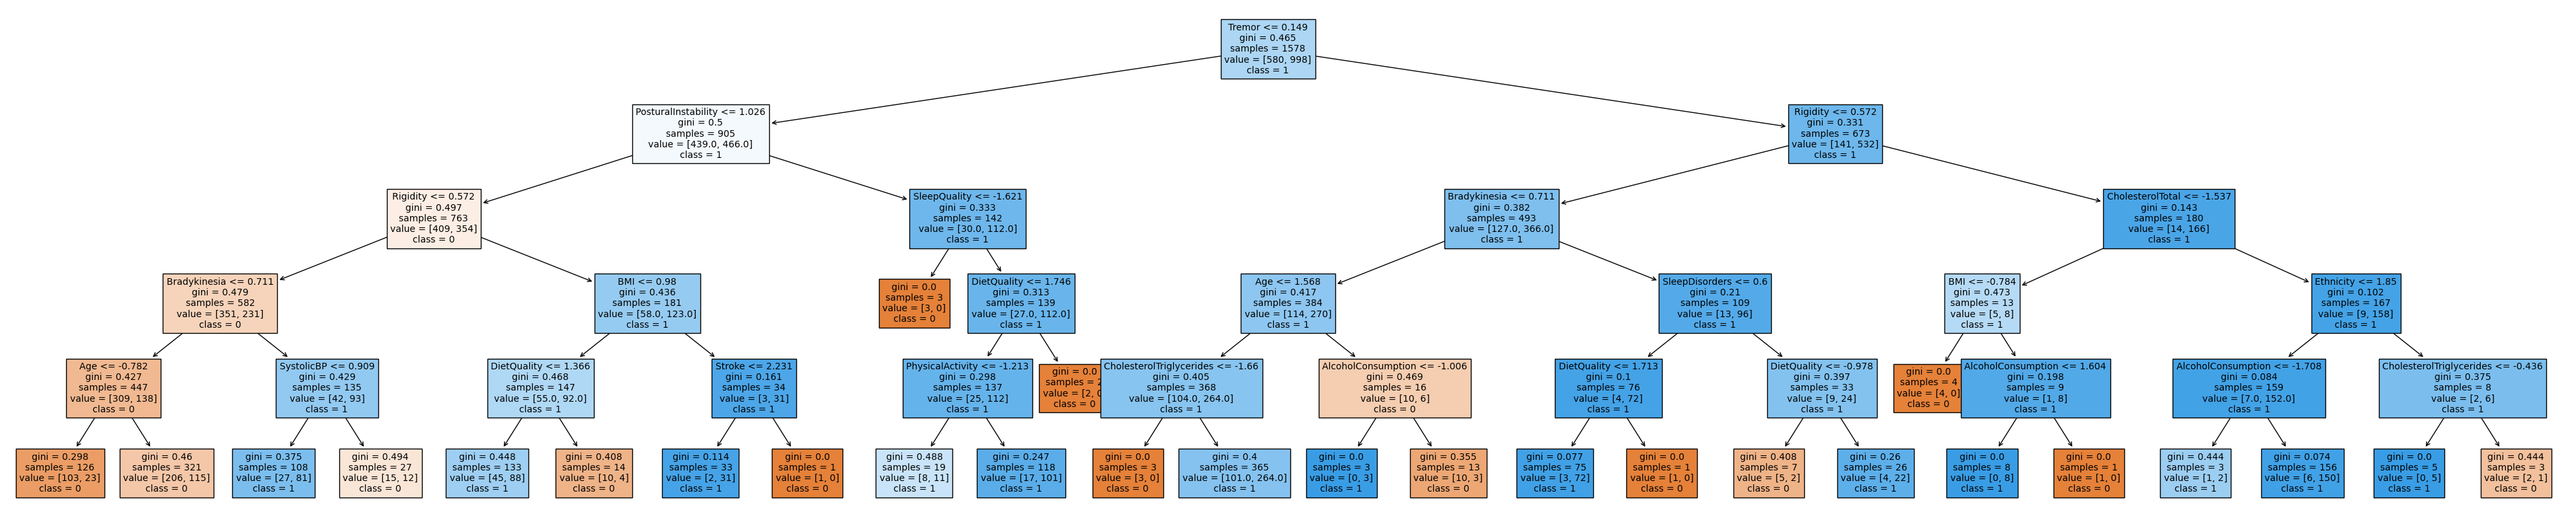

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,10))
plot_tree(model, feature_names=X.columns, class_names=["0","1"],fontsize=10, filled=True)